In [9]:
from camera import FakeCamera
import time
from skimage.metrics import structural_similarity
import cv2
import numpy as np
import matplotlib.pyplot as plt

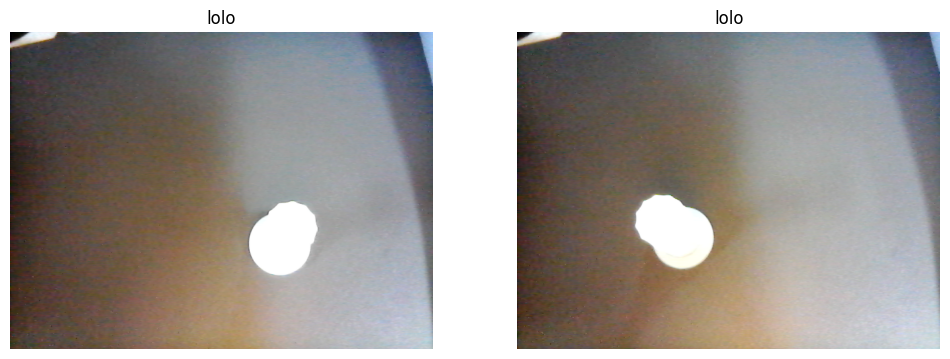

In [10]:
cameras = [FakeCamera('images/img' + str(i + 7) + '.png') for i in range(2)]

def show_imgs(imgs):
    fig, axs = plt.subplots(1, len(imgs), figsize=(12, 12))
    for i, img in enumerate(imgs):
        axs[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[i].set_title("lolo")
        axs[i].axis("off")
    plt.show()

    

show_imgs([cameras[0].get_frame()[1], cameras[1].get_frame()[1]])

Image Similarity: 82.7014%
two pieces
[10883.0, 9769.0, 469.0, 97.0, 89.0, 40.5, 18.5, 16.0, 15.5, 15.0, 13.0, 10.0, 9.0, 6.5, 6.0, 6.0, 5.5, 5.0, 4.5, 4.0, 4.0, 4.0, 4.0, 3.0, 3.0, 3.0, 2.5, 2.0, 1.5, 1.5, 1.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


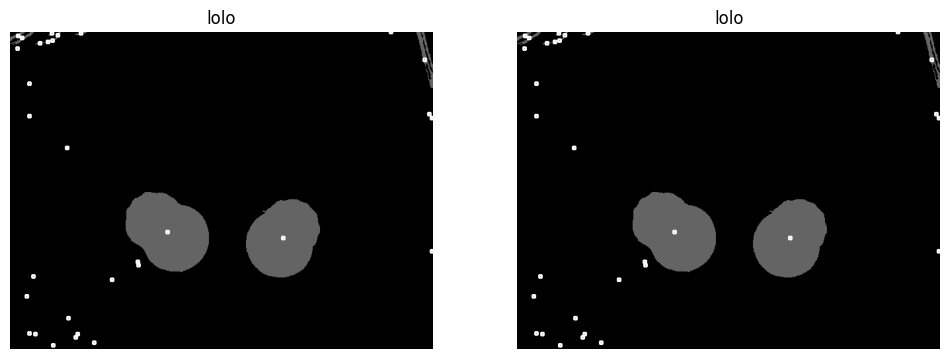

In [46]:
def compare_images(before, after):
    #Greyscale stuff
    before = cv2.cvtColor(before, cv2.COLOR_BGR2GRAY)
    after = cv2.cvtColor(after, cv2.COLOR_BGR2GRAY)

    #blur stuff
    #before = cv2.GaussianBlur(before, (5, 5), 0)
    #after = cv2.GaussianBlur(after, (5, 5), 0)
    #before = cv2.GaussianBlur(before, (5, 5), 0)
    #after = cv2.GaussianBlur(after, (5, 5), 0)

    #SSIM stuff
    (score, diff) = structural_similarity(before, after, full=True)
    print("Image Similarity: {:.4f}%".format(score * 100))


    diff = (diff * 255).astype("uint8")
    diff_box = cv2.merge([diff, diff, diff])

    thresh = cv2.threshold(diff, 100, 255, cv2.THRESH_BINARY_INV)[1]
    #print ("Threshold: {}".format(thresh))
    contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]

    mask = np.zeros(before.shape, dtype='uint8')
    filled_after = after.copy()
    big_area = []
    for k in contours:
        area = cv2.contourArea(k)
        big_area.append(area)
        #sort with biggest area first
        big_area.sort(reverse=True)
    if big_area[0]*0.8 < big_area[1] < big_area[0]*1.2:
        if big_area[1]*0.7 < big_area[2] < big_area[1]*1.3:
            if big_area[2]*0.8 < big_area[3] < big_area[2]*1.2:
                print("casttle")
        print("two pieces")
    print(big_area)

    for c in contours:
        area = cv2.contourArea(c)
        if area > 2000:
            x,y,w,h = cv2.boundingRect(c)
            cv2.rectangle(before, (x, y), (x + w, y + h), (36,255,12), 2)
            cv2.rectangle(after, (x, y), (x + w, y + h), (36,255,12), 2)
            cv2.rectangle(diff_box, (x, y), (x + w, y + h), (36,255,12), 2)
            cv2.drawContours(mask, [c], 0, (100,100,100), -1)
            cv2.drawContours(filled_after, [c], 0, (0,255,0), -1)
            cx = x + w//2
            cy = y + h//2
            cv2.rectangle(mask, (cx-2, cy-2), (cx+2, cy+2), (255,255,255), 2)
    
    return mask

mask = compare_images(cameras[0].get_frame()[1], cameras[1].get_frame()[1])
show_imgs([mask, mask])